In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from keras.datasets import mnist

(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [3]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [4]:
X_train[0].shape

(28, 28)

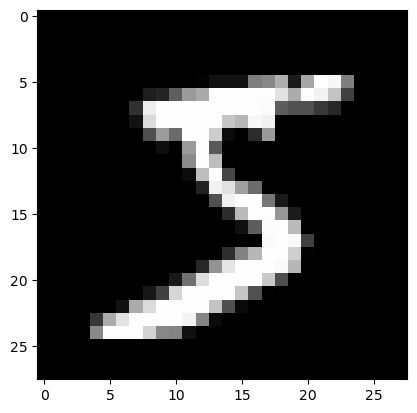

In [5]:
plt.imshow(X_train[0], cmap='gray')

In [6]:
y_train[0]

5

In [7]:
pd.Series(y_train).value_counts()

1    6742
7    6265
3    6131
2    5958
9    5949
0    5923
6    5918
8    5851
4    5842
5    5421
dtype: int64

In [8]:
pd.Series(y_test).value_counts()

1    1135
2    1032
7    1028
3    1010
9    1009
4     982
0     980
8     974
6     958
5     892
dtype: int64

In [9]:
X_train = X_train/255
X_test = X_test/255

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
X_train_1, X_train_2, y_train_1, y_train_2 = train_test_split(X_train, y_train, test_size=0.5, random_state=2019)

In [12]:
import time
import torch
from torch import nn
from torch.nn import CrossEntropyLoss

In [13]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

cnn = nn.Sequential(nn.Conv2d(in_channels=1, out_channels=32, kernel_size=5, padding=2),
                    nn.ReLU(),
                    nn.Conv2d(in_channels=32, out_channels=32, kernel_size=5, padding=2),
                    nn.ReLU(),
                    nn.MaxPool2d(kernel_size=2, stride=2),
                    nn.Dropout(0.25),
                    nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3, padding=1),
                    nn.ReLU(),
                    nn.Conv2d(in_channels=64, out_channels=64, kernel_size=3, padding=1),
                    nn.ReLU(),
                    nn.MaxPool2d(kernel_size=2, stride=2),
                    nn.Dropout(0.25),
                    nn.Flatten(),
                    nn.Linear(64*7*7, 256),
                    nn.ReLU(),
                    nn.Dropout(0.5),
                    nn.Linear(256, 10)).to(device)

In [14]:
device

device(type='cuda')

In [15]:
batch_size = 1000
train_dataset_1 = torch.utils.data.TensorDataset(torch.tensor(X_train_1, dtype=torch.float32).unsqueeze(1),
                                               torch.tensor(y_train_1, dtype=torch.long))
train_loader_1 = torch.utils.data.DataLoader(train_dataset_1, batch_size=batch_size)
X_test = torch.tensor(X_test, dtype=torch.float32).unsqueeze(1).to(device)
y_test = torch.tensor(y_test, dtype=torch.long).to(device)

In [16]:
loss = CrossEntropyLoss(reduction='none')
lr = 0.01
optimizer = torch.optim.Adam(cnn.parameters(), lr=lr)

In [17]:
epochs = 30
train_losses = []
test_losses = []
for epoch in range(epochs):
    start = time.time()
    training_loss = 0
    for data, target in train_loader_1:
        optimizer.zero_grad()
        data = data.to(device)
        target = target.to(device)
        output = cnn(data)
        L = loss(output, target).sum()
        training_loss += L.item()
        L.backward()
        optimizer.step()
    
    test_softmax_coefficients = cnn(X_test)
    test_loss = torch.sum(loss(test_softmax_coefficients, y_test)).item()

    training_loss = training_loss / len(y_train_1)
    test_loss = test_loss / len(y_test)
    train_losses.append(training_loss)
    test_losses.append(test_loss)
    
    end = time.time()
    print("Epoch {}: Train_loss {}, Validation_loss {}, Seconds {}".format(epoch, training_loss, test_loss, end-start))

Epoch 0: Train_loss 1.7714698954264323, Validation_loss 0.82800751953125, Seconds 9.659139156341553
Epoch 1: Train_loss 0.5955556315104167, Validation_loss 0.35820224609375, Seconds 9.71691370010376
Epoch 2: Train_loss 0.3131718495686849, Validation_loss 0.252058203125, Seconds 10.035048007965088
Epoch 3: Train_loss 0.22964505208333333, Validation_loss 0.20460169677734374, Seconds 4.6399781703948975
Epoch 4: Train_loss 0.18978153788248697, Validation_loss 0.15609539794921876, Seconds 3.089395046234131
Epoch 5: Train_loss 0.16601884511311849, Validation_loss 0.13364024658203125, Seconds 5.2925333976745605
Epoch 6: Train_loss 0.13375302708943684, Validation_loss 0.119810986328125, Seconds 3.0865731239318848
Epoch 7: Train_loss 0.12584572830200194, Validation_loss 0.11881824951171875, Seconds 5.343087673187256
Epoch 8: Train_loss 0.11670133260091146, Validation_loss 0.09922913818359375, Seconds 3.0603673458099365
Epoch 9: Train_loss 0.10688852602640787, Validation_loss 0.11544532470703125

In [18]:
batch_size = 1000
train_dataset_2 = torch.utils.data.TensorDataset(torch.tensor(X_train_2, dtype=torch.float32).unsqueeze(1),
                                               torch.tensor(y_train_2, dtype=torch.long))
train_loader_2 = torch.utils.data.DataLoader(train_dataset_2, batch_size=batch_size)

In [19]:
epochs = 30
for epoch in range(epochs):
    start = time.time()
    training_loss = 0
    for data, target in train_loader_2:
        optimizer.zero_grad()
        data = data.to(device)
        target = target.to(device)
        output = cnn(data)
        L = loss(output, target).sum()
        training_loss += L.item()
        L.backward()
        optimizer.step()
    
    test_softmax_coefficients = cnn(X_test)
    test_loss = torch.sum(loss(test_softmax_coefficients, y_test)).item()

    training_loss = training_loss / len(y_train_2)
    test_loss = test_loss / len(y_test)
    train_losses.append(training_loss)
    test_losses.append(test_loss)
    
    end = time.time()
    print("Epoch {}: Train_loss {}, Validation_loss {}, Seconds {}".format(epoch, training_loss, test_loss, end-start))

Epoch 0: Train_loss 0.09120232187906901, Validation_loss 0.0738545166015625, Seconds 3.495479106903076
Epoch 1: Train_loss 0.08467760009765625, Validation_loss 0.07396641845703125, Seconds 7.138422012329102
Epoch 2: Train_loss 0.07810921262105305, Validation_loss 0.07901961669921875, Seconds 3.5320727825164795
Epoch 3: Train_loss 0.07972515246073406, Validation_loss 0.07342879028320312, Seconds 7.205191135406494
Epoch 4: Train_loss 0.07592745450337728, Validation_loss 0.07570122680664063, Seconds 3.6919610500335693
Epoch 5: Train_loss 0.08022292327880859, Validation_loss 0.07681632080078125, Seconds 7.399899005889893
Epoch 6: Train_loss 0.07135829696655273, Validation_loss 0.07389111328125, Seconds 3.7598180770874023
Epoch 7: Train_loss 0.0724427116394043, Validation_loss 0.0739376220703125, Seconds 7.419664144515991
Epoch 8: Train_loss 0.07821850128173828, Validation_loss 0.07012386474609375, Seconds 3.4535796642303467
Epoch 9: Train_loss 0.07056461359659831, Validation_loss 0.0823850

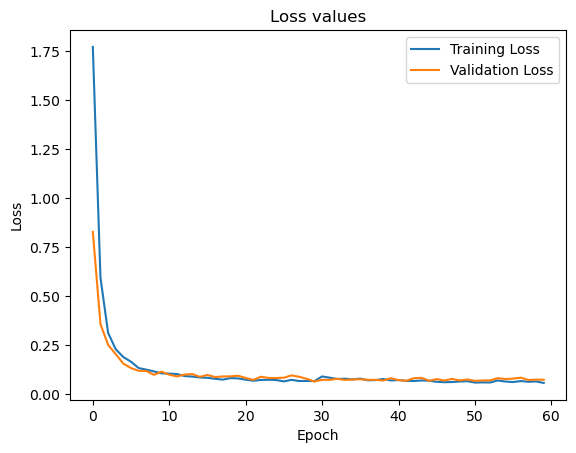

In [20]:
plt.plot(train_losses, label="Training Loss")
plt.plot(test_losses, label="Validation Loss")
plt.title("Loss values")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()

In [21]:
y_test_softmax_coefficients = cnn(X_test)
y_test_pred_proba = nn.Softmax(dim=1)(test_softmax_coefficients)
y_test_pred = torch.argmax(y_test_pred_proba, dim=1)

In [22]:
y_test = y_test.detach().cpu().numpy()
y_test_pred_proba = y_test_pred_proba.detach().cpu().numpy()
y_test_pred = y_test_pred.detach().cpu().numpy()

In [23]:
from sklearn.metrics import classification_report, confusion_matrix

print(classification_report(y_test,y_test_pred))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98       980
           1       0.99      0.99      0.99      1135
           2       0.98      0.99      0.99      1032
           3       0.97      0.99      0.98      1010
           4       0.99      0.95      0.97       982
           5       0.98      0.97      0.97       892
           6       0.98      0.98      0.98       958
           7       0.99      0.98      0.98      1028
           8       0.98      0.98      0.98       974
           9       0.95      0.98      0.97      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



In [24]:
confusion_matrix(y_test,y_test_pred)

array([[ 959,    0,    1,    0,    0,    1,   11,    2,    5,    1],
       [   2, 1123,    0,    3,    0,    1,    2,    2,    1,    1],
       [   0,    1, 1023,    1,    1,    0,    0,    2,    4,    0],
       [   0,    0,    4,  999,    0,    5,    0,    1,    0,    1],
       [   2,    2,    0,    0,  932,    0,    4,    3,    2,   37],
       [   0,    0,    0,   22,    0,  863,    1,    0,    3,    3],
       [   9,    3,    0,    0,    4,    5,  935,    0,    2,    0],
       [   0,    3,   13,    4,    0,    0,    0, 1003,    0,    5],
       [   0,    1,    2,    3,    0,    3,    0,    0,  959,    6],
       [   3,    1,    0,    1,    2,    3,    0,    5,    1,  993]],
      dtype=int64)

Text(0.5, 1.0, 'Receiver Operating Characteristic - PyTorch')

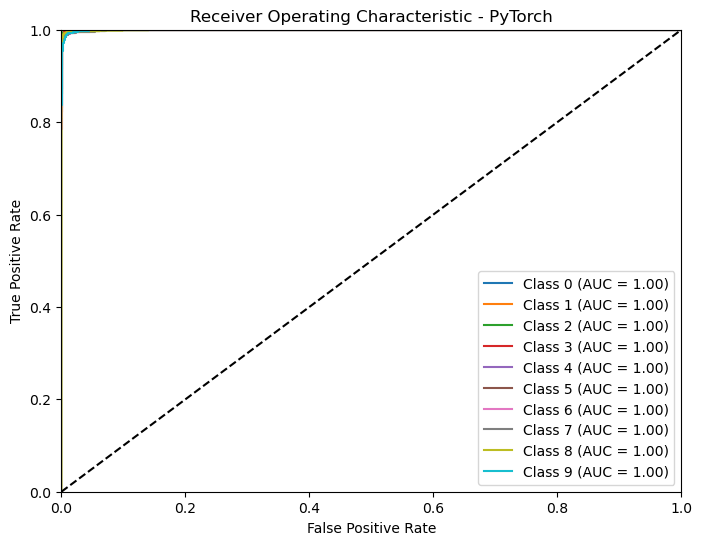

In [25]:
from sklearn.metrics import roc_curve, roc_auc_score

plt.figure(figsize=(8, 6))
for class_idx in range(len(sorted(set(y_train)))):
    y_true = (y_test == sorted(set(y_train))[class_idx]).astype(int)
    y_pred_proba = y_test_pred_proba[:, class_idx]
    fpr, tpr, _ = roc_curve(y_true, y_pred_proba)
    roc_auc = roc_auc_score(y_true, y_pred_proba)
    plt.plot(fpr, tpr, label=f'Class {sorted(set(y_train))[class_idx]} (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.legend(loc='lower right')
plt.xlim(0, 1)
plt.ylim(0, 1)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic - PyTorch')